In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading CSV into Python using Pandas

In [3]:
spotify_df = pd.read_csv("data/Spotify_Youtube.csv",
    index_col=False,
    usecols=lambda c: c not in ["Unnamed: 0", "Description"],
)

In [4]:
spotify_df.head(2)

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08


#### All the available columns

In [5]:
print(*spotify_df.columns, sep=" | ")

Artist | Url_spotify | Track | Album | Album_type | Uri | Danceability | Energy | Key | Loudness | Speechiness | Acousticness | Instrumentalness | Liveness | Valence | Tempo | Duration_ms | Url_youtube | Title | Channel | Views | Likes | Comments | Licensed | official_video | Stream


#### Describe Simple Statistics and Information

In [6]:
spotify_df.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [7]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Url_spotify       20718 non-null  object 
 2   Track             20718 non-null  object 
 3   Album             20718 non-null  object 
 4   Album_type        20718 non-null  object 
 5   Uri               20718 non-null  object 
 6   Danceability      20716 non-null  float64
 7   Energy            20716 non-null  float64
 8   Key               20716 non-null  float64
 9   Loudness          20716 non-null  float64
 10  Speechiness       20716 non-null  float64
 11  Acousticness      20716 non-null  float64
 12  Instrumentalness  20716 non-null  float64
 13  Liveness          20716 non-null  float64
 14  Valence           20716 non-null  float64
 15  Tempo             20716 non-null  float64
 16  Duration_ms       20716 non-null  float6

In [8]:
spotify_df.nunique()

Artist               2079
Url_spotify          2079
Track               17841
Album               11937
Album_type              3
Uri                 18862
Danceability          898
Energy               1268
Key                    12
Loudness             9417
Speechiness          1303
Acousticness         3138
Instrumentalness     4012
Liveness             1536
Valence              1293
Tempo               15024
Duration_ms         14690
Url_youtube         18154
Title               18146
Channel              6714
Views               19245
Likes               17939
Comments            10485
Licensed                2
official_video          2
Stream              18461
dtype: int64

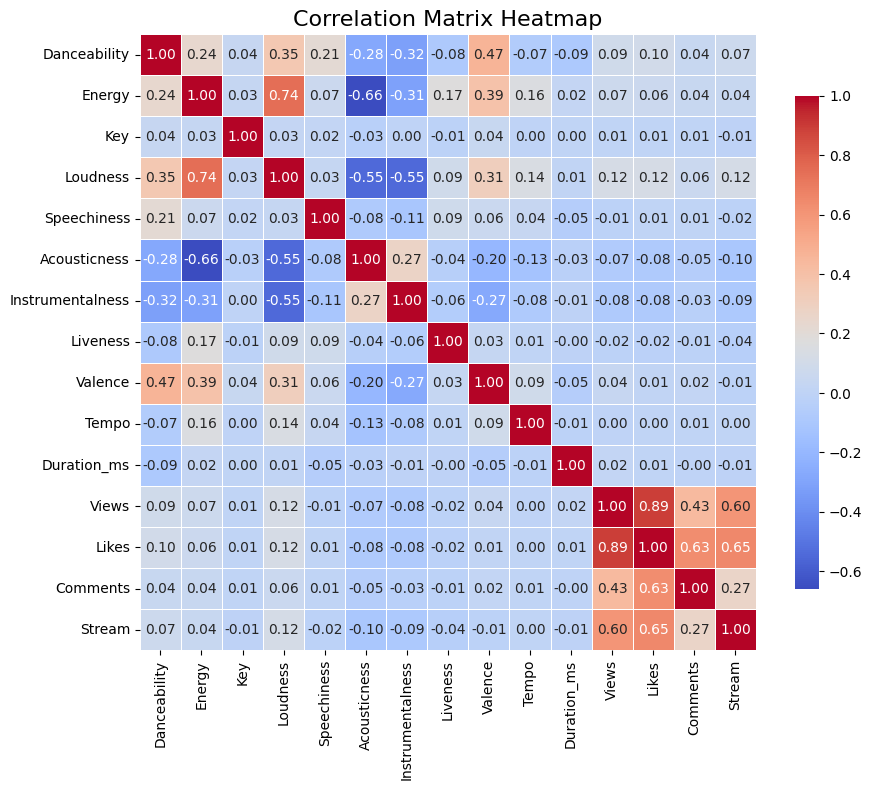

In [9]:
correlation_matrix = spotify_df.select_dtypes(include=['number']).corr(min_periods=1000)

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8},
)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

#### Distribution of Each Variables

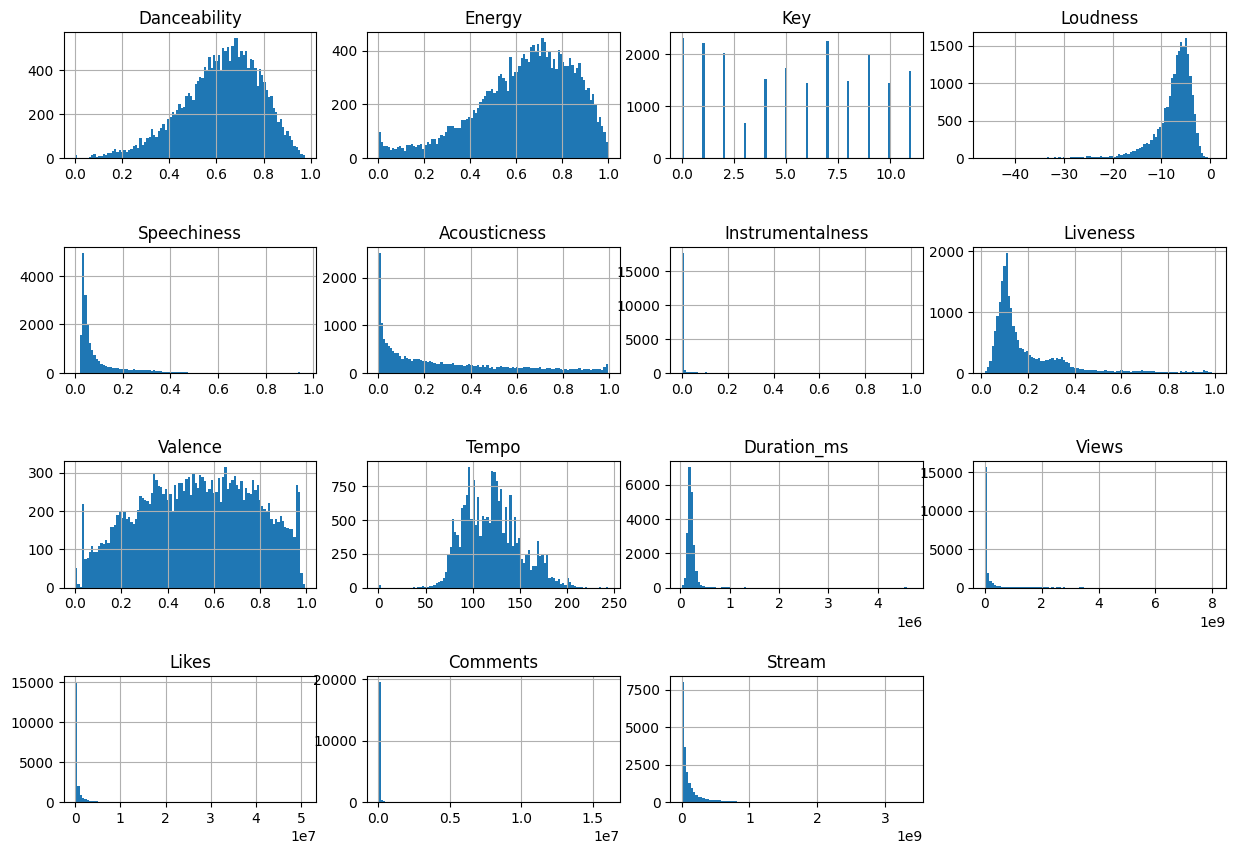

In [10]:
spotify_df.select_dtypes(include=['number']).hist(bins=100, figsize=(15, 10))
plt.subplots_adjust(hspace=.7, wspace=0.2)
plt.show()

#### Which Key is Most Popular/Unpopular?

In [11]:
num2key = {0: "C", 1: "C#", 2: "D", 3: "D#", 4: "E", 5: "F", 6: "F#", 7: "G", 8: "G#", 9: "A", 10: "A#", 11: "B"}
spotify_df["Key"].value_counts().rename(index=num2key).sort_index()

Key
A     1979
A#    1439
B     1667
C     2305
C#    2211
D     2021
D#     670
E     1515
F     1731
F#    1443
G     2252
G#    1483
Name: count, dtype: int64

#### Interesting Things to Try
1. [Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### missing values...they deserve more hate than they get

missing values in each column:
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Licensed            470
official_video      470
Stream              576
dtype: int64


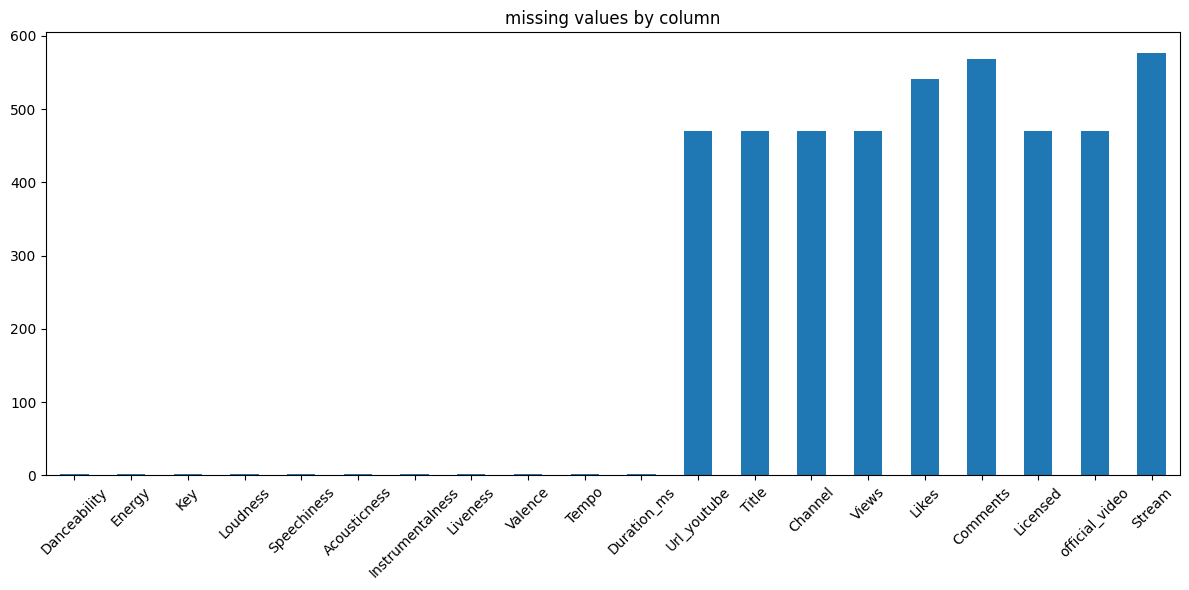

In [12]:
# analyze missing values
missing_values = spotify_df.isnull().sum()
print("missing values in each column:")
print(missing_values[missing_values > 0])

# visualize missing values
plt.figure(figsize=(12, 6))
missing_values[missing_values > 0].plot(kind='bar')
plt.title('missing values by column')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### numerical features distributions visualizations...feeling bad for whos gonna recite this

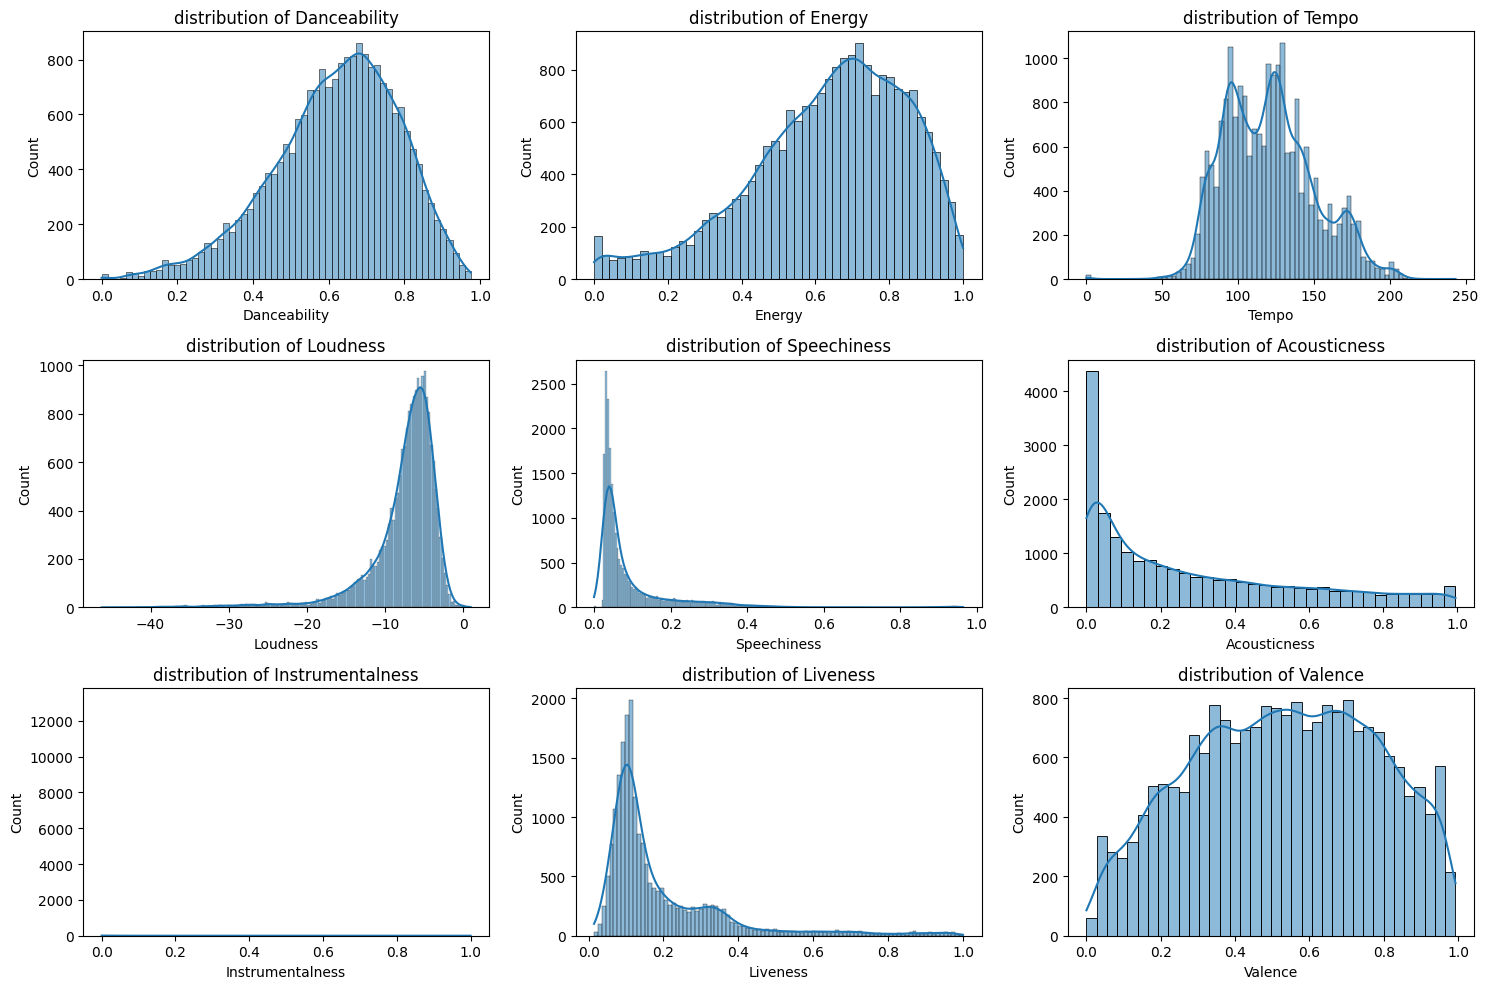


summary statistics of audio features:


,Danceability,Energy,Tempo,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence
count,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000
mean,0.619777,0.635250,120.638340,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853
std,0.165272,0.214147,29.579018,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000
25%,0.518000,0.507000,97.002000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000
50%,0.637000,0.666000,119.965000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000
75%,0.740250,0.798000,139.935000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250
max,0.975000,1.000000,243.372000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000


In [13]:
# visualizations for numerical features
numerical_features = ['Danceability', 'Energy', 'Tempo', 'Loudness', 'Speechiness', 
                     'Acousticness', 'Instrumentalness', 'Liveness', 'Valence']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=spotify_df, x=feature, kde=True)
    plt.title(f'distribution of {feature}')
plt.tight_layout()
plt.show()

# basic statistics of numerical features
print("\nsummary statistics of audio features:")
spotify_df[numerical_features].describe()

### top 10s...and a bonus top 5

top 10 most streamed songs on spotify:
                                               Track            Artist  \
15250                                Blinding Lights        The Weeknd   
12452                                   Shape of You        Ed Sheeran   
19186                              Someone You Loved     Lewis Capaldi   
17937                     rockstar (feat. 21 Savage)       Post Malone   
17445  Sunflower - Spider-Man: Into the Spider-Verse          Swae Lee   
17938  Sunflower - Spider-Man: Into the Spider-Verse       Post Malone   
13503                                      One Dance             Drake   
16028                                         Closer            Halsey   
16099                                         Closer  The Chainsmokers   
14030                                       Believer   Imagine Dragons   

             Stream  
15250  3.386520e+09  
12452  3.362005e+09  
19186  2.634013e+09  
17937  2.594927e+09  
17445  2.538330e+09  
17938  2.53833

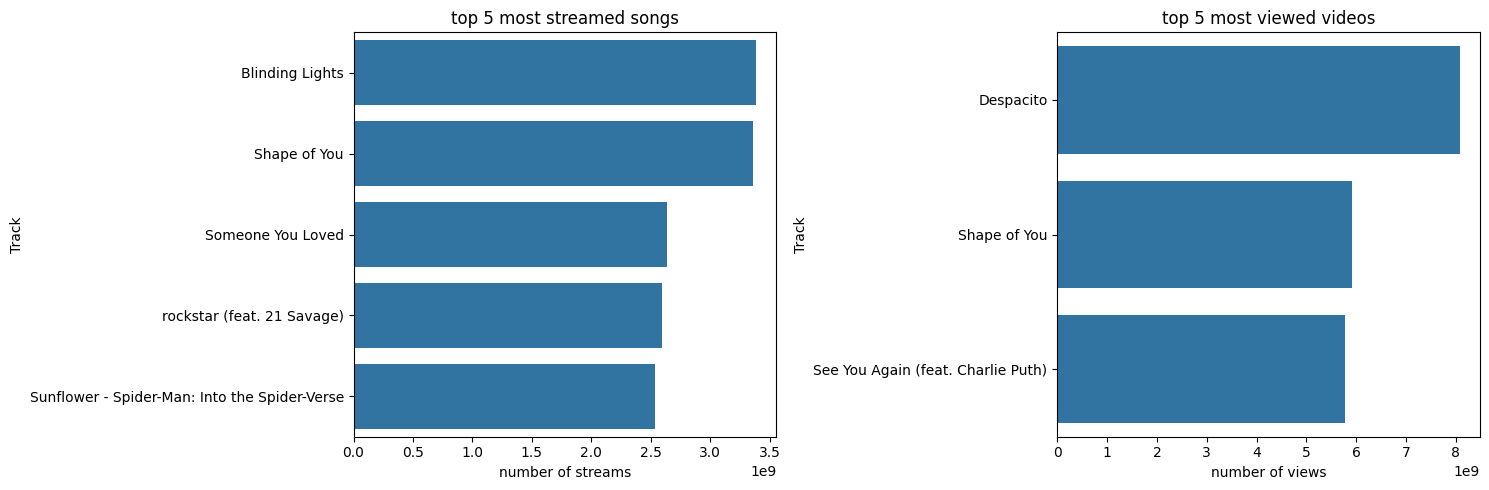

In [14]:
# top 10 streamed songs on spotify
print("top 10 most streamed songs on spotify:")
top_streams = spotify_df.nlargest(10, 'Stream')[['Track', 'Artist', 'Stream']]
print(top_streams)

# top 10 viewed videos on YouTube
print("\ntop 10 viewed videos on youTube:")
top_views = spotify_df.nlargest(10, 'Views')[['Track', 'Artist', 'Views']]
print(top_views)

# visualize top 5 songs by streams and views
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=top_streams.head(), x='Stream', y='Track')
plt.title('top 5 most streamed songs')
plt.xlabel('number of streams')

plt.subplot(1, 2, 2)
sns.barplot(data=top_views.head(), x='Views', y='Track')
plt.title('top 5 most viewed videos')
plt.xlabel('number of views')

plt.tight_layout()
plt.show()

### correlations of numeerical features...and the strongest of them

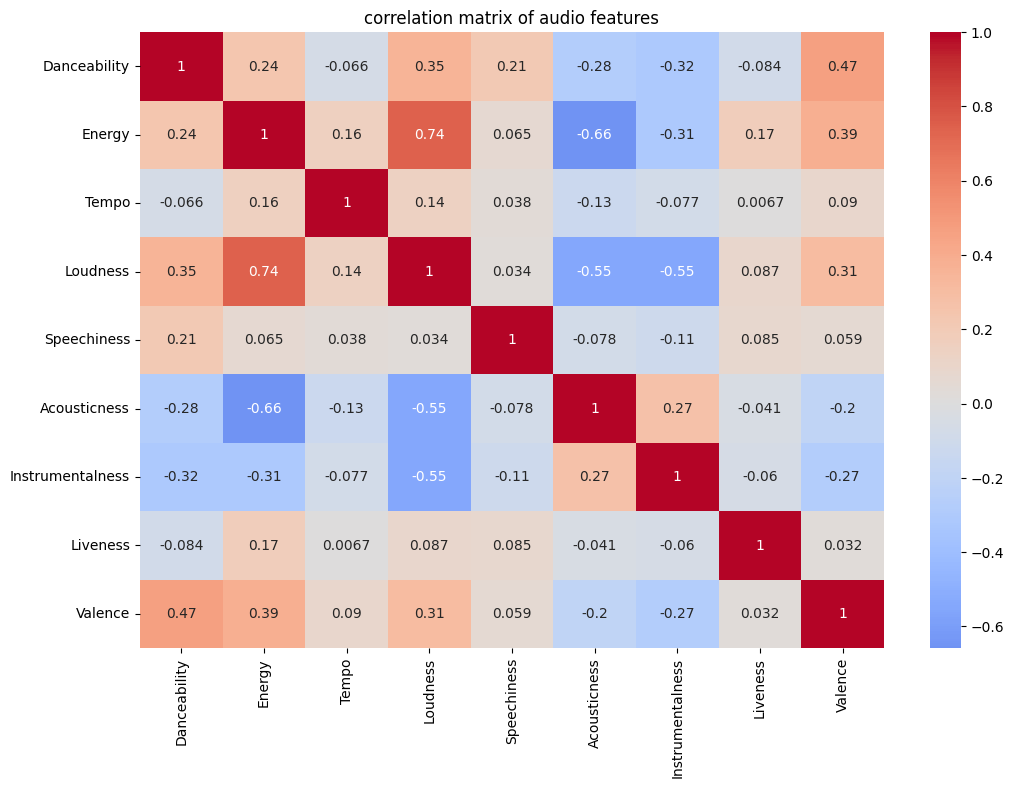


strongest feature correlations:
Loudness          Energy              0.744845
Energy            Loudness            0.744845
                  Acousticness       -0.658304
Acousticness      Energy             -0.658304
                  Loudness           -0.547680
Loudness          Acousticness       -0.547680
Instrumentalness  Loudness           -0.545406
Loudness          Instrumentalness   -0.545406
Danceability      Valence             0.465756
Valence           Danceability        0.465756
dtype: float64


In [15]:
# correlation matrix for numerical features
correlation_matrix = spotify_df[numerical_features].corr()

# correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('correlation matrix of audio features')
plt.show()

# strongest correlations
correlations = correlation_matrix.unstack()
sorted_correlations = correlations.sort_values(key=abs, ascending=False)
print("\nstrongest feature correlations:")
print(sorted_correlations[sorted_correlations != 1.0][:10])

### feature engineering...sounds fancy

sample of new features:
                                           Track    Artist  views_per_like  \
0                                 Feel Good Inc.  Gorillaz      111.487995   
1                                Rhinestone Eyes  Gorillaz       66.731328   
2  New Gold (feat. Tame Impala and Bootie Brown)  Gorillaz       29.896488   
3                             On Melancholy Hill  Gorillaz      118.392975   
4                                 Clint Eastwood  Gorillaz       99.798164   

   comments_per_view  engagement_ratio  
0           0.000245          0.009215  
1           0.000431          0.015416  
2           0.000877          0.034326  
3           0.000261          0.008707  
4           0.000252          0.010272  


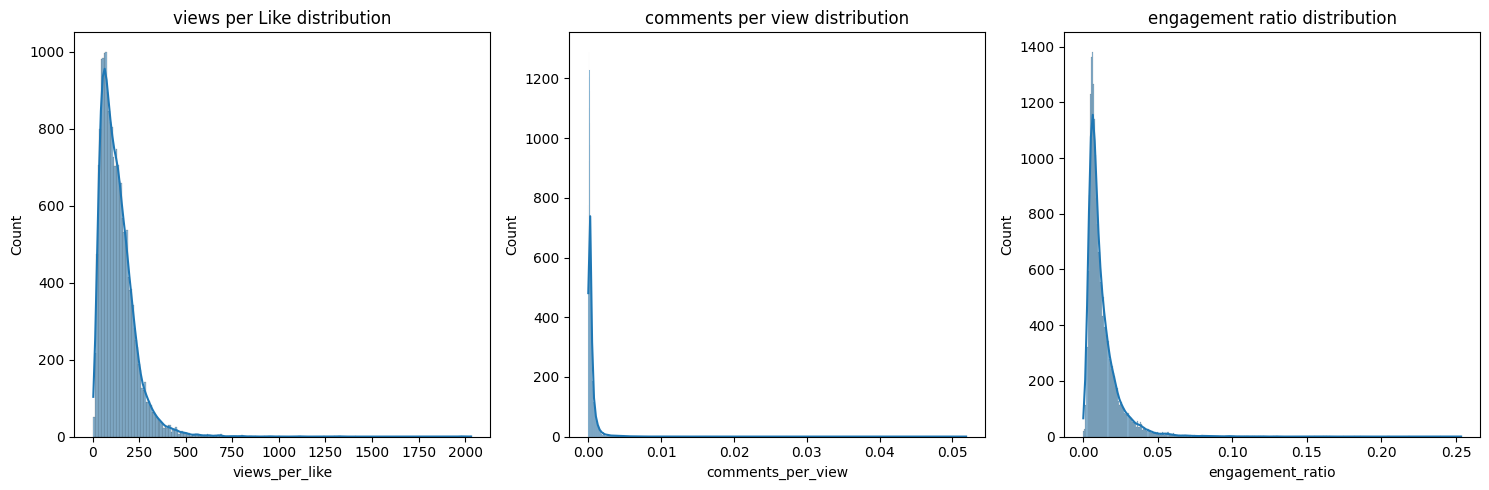

In [ ]:
# new features
spotify_df['views_per_like'] = spotify_df['Views'] / spotify_df['Likes']
spotify_df['comments_per_view'] = spotify_df['Comments'] / spotify_df['Views']
spotify_df['engagement_ratio'] = (spotify_df['Likes'] + spotify_df['Comments']) / spotify_df['Views']

# sample of new features
print("sample of new features:")
print(spotify_df[['Track', 'Artist', 'views_per_like', 'comments_per_view', 'engagement_ratio']].head())

# visualize distribution of new features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=spotify_df, x='views_per_like', kde=True)
plt.title('views per Like distribution')

plt.subplot(1, 3, 2)
sns.histplot(data=spotify_df, x='comments_per_view', kde=True)
plt.title('comments per view distribution')

plt.subplot(1, 3, 3)
sns.histplot(data=spotify_df, x='engagement_ratio', kde=True)
plt.title('engagement ratio distribution')

plt.tight_layout()
plt.show()

## bonusss

### musical features in comparison to popularity

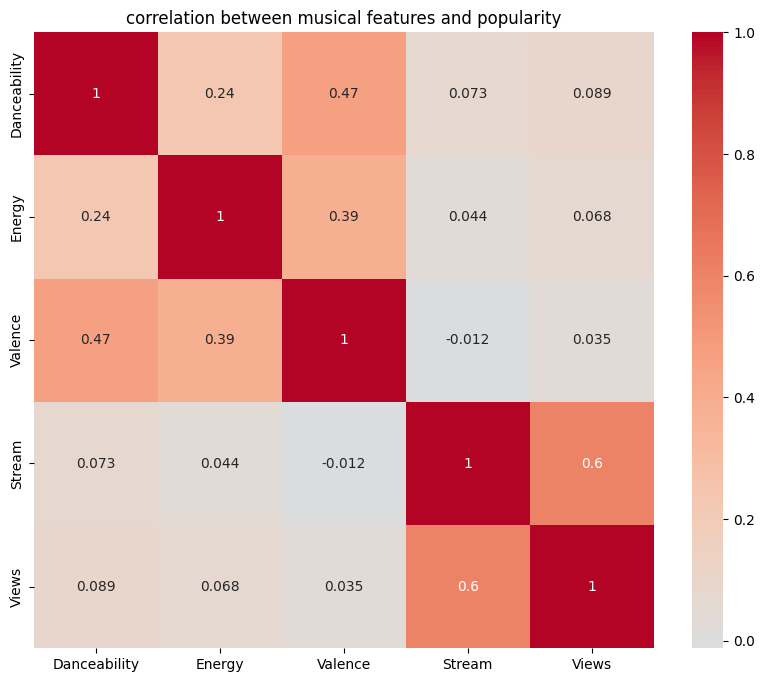

In [17]:
# correlations between musical features and popularity
popularity_features = ['Danceability', 'Energy', 'Valence', 'Stream', 'Views']
correlation_matrix = spotify_df[popularity_features].corr()

# correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('correlation between musical features and popularity')
plt.show()

### singles in comparison to albums

singles vs albums performance:
                 Stream        Views     Likes  Comments
is_single                                               
False      1.468117e+08  97487428.25  647426.2  27635.18
True       1.016708e+08  82698859.34  713608.0  27152.19


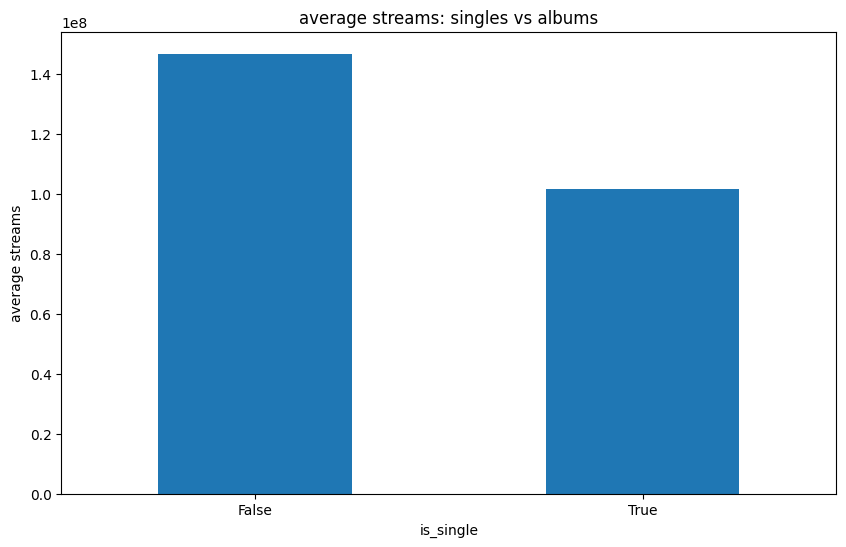

In [18]:
# singles vs slbum tracks
spotify_df['is_single'] = spotify_df['Album_type'].str.lower() == 'single'

# performance metrics
singles_vs_albums = spotify_df.groupby('is_single').agg({
    'Stream': 'mean',
    'Views': 'mean',
    'Likes': 'mean',
    'Comments': 'mean'
}).round(2)

print("singles vs albums performance:")
print(singles_vs_albums)

# visualize the differences
plt.figure(figsize=(10, 6))
singles_vs_albums['Stream'].plot(kind='bar')
plt.title('average streams: singles vs albums')
plt.ylabel('average streams')
plt.xticks(rotation=0)
plt.show()

### youtube engagements in comparison to spotify streams

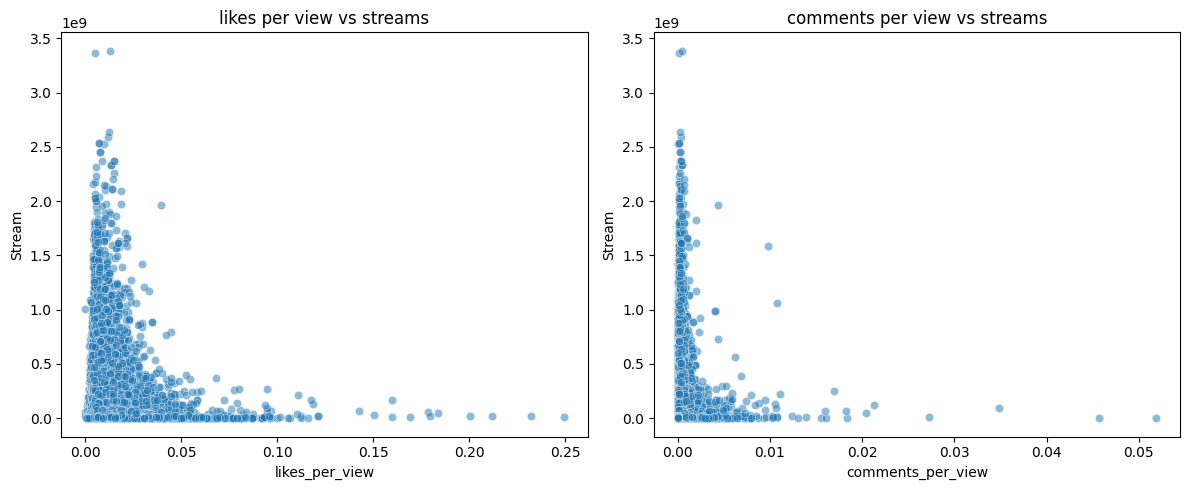

In [19]:
# youtube engagement vs spotify streams
plt.figure(figsize=(12, 5))

# engagement metrics
spotify_df['likes_per_view'] = spotify_df['Likes'] / spotify_df['Views']
spotify_df['comments_per_view'] = spotify_df['Comments'] / spotify_df['Views']

plt.subplot(1, 2, 1)
sns.scatterplot(data=spotify_df, x='likes_per_view', y='Stream', alpha=0.5)
plt.title('likes per view vs streams')

plt.subplot(1, 2, 2)
sns.scatterplot(data=spotify_df, x='comments_per_view', y='Stream', alpha=0.5)
plt.title('comments per view vs streams')

plt.tight_layout()
plt.show()

### official in comparison to unofficial videos

official vs unofficial videos performance:
                       Views      Likes  Comments
official_video                                   
False           2.250871e+07  175808.24   7394.21
True            1.144948e+08  802605.09  33264.71


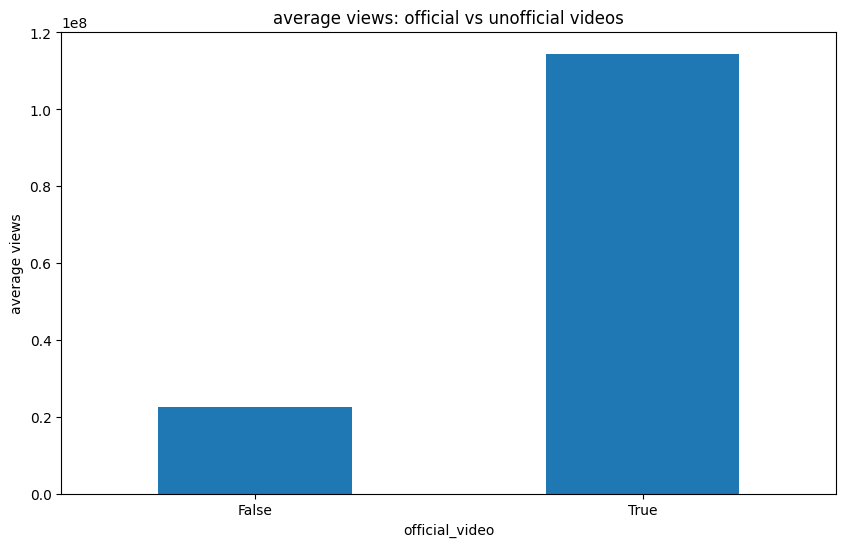

In [20]:
# official vs unofficial videos
video_comparison = spotify_df.groupby('official_video').agg({
    'Views': 'mean',
    'Likes': 'mean',
    'Comments': 'mean'
}).round(2)

print("official vs unofficial videos performance:")
print(video_comparison)

plt.figure(figsize=(10, 6))
video_comparison['Views'].plot(kind='bar')
plt.title('average views: official vs unofficial videos')
plt.ylabel('average views')
plt.xticks(rotation=0)
plt.show()

### got a question: what are impacts of official vs unofficial videos on musical success?

C:\Users\Gaming PC\AppData\Local\Temp\ipykernel_5296\3561162950.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  spotify_df['official_video'] = spotify_df['official_video'].fillna(False)


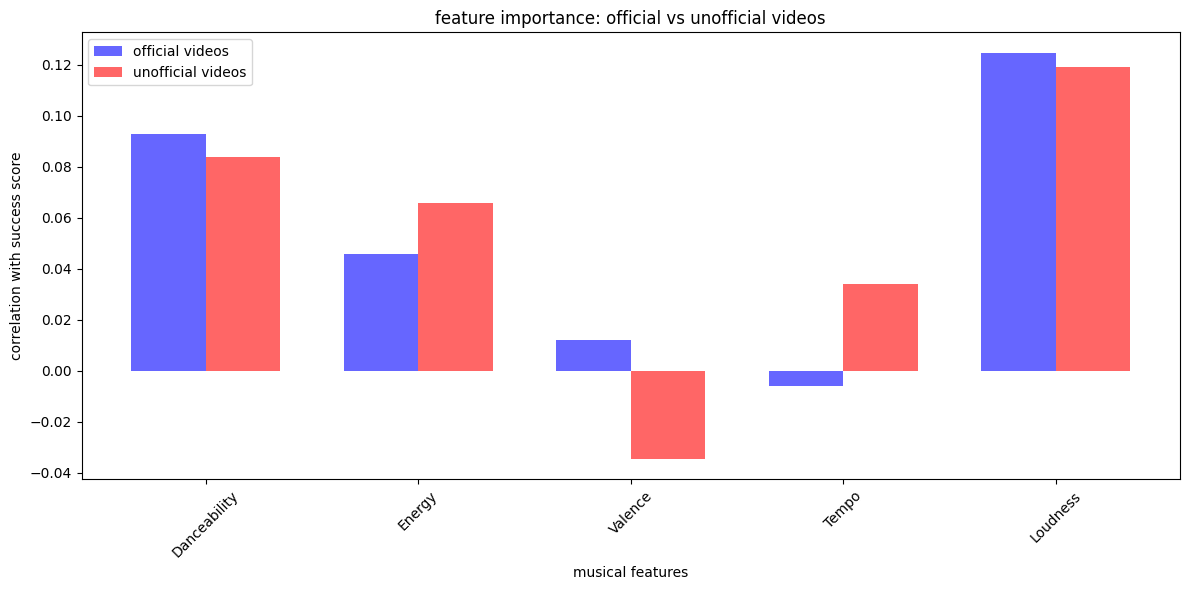


average success scores:
official_video
False    0.010821
True     0.024935
Name: success_score, dtype: float64


In [21]:
# success metrics
spotify_df['success_score'] = (spotify_df['Stream'] / spotify_df['Stream'].max() + 
                      spotify_df['Views'] / spotify_df['Views'].max() + 
                      spotify_df['Likes'] / spotify_df['Likes'].max()) / 3

# clean official_video column
spotify_df['official_video'] = spotify_df['official_video'].fillna(False)

# correlations
features = ['Danceability', 'Energy', 'Valence', 'Tempo', 'Loudness']

official_corr = spotify_df[spotify_df['official_video']].loc[:, features + ['success_score']].corr()['success_score'].drop('success_score')
unofficial_corr = spotify_df[~spotify_df['official_video']].loc[:, features + ['success_score']].corr()['success_score'].drop('success_score')

# plot correlations
plt.figure(figsize=(12, 6))
x = range(len(features))
width = 0.35

plt.bar([i - width/2 for i in x], official_corr, width, label='official videos', color='blue', alpha=0.6)
plt.bar([i + width/2 for i in x], unofficial_corr, width, label='unofficial videos', color='red', alpha=0.6)

plt.xlabel('musical features')
plt.ylabel('correlation with success score')
plt.title('feature importance: official vs unofficial videos')
plt.xticks(x, features, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# average success scores
print("\naverage success scores:")
print(spotify_df.groupby('official_video')['success_score'].mean())